In [ ]:
Tuning Gradient Boosting Trees

In [2]:
#Load this line within an IPython notebook to visualize within the notebook
%matplotlib inline 

from __future__ import division #Load within Python 2.7 for regular division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

cali_housing = fetch_california_housing()

X = cali_housing.data
y = cali_housing.target

#bin output variable to split training and testing sets into two similar sets
bins = np.arange(6)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [3]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'max_features' : ['log2',1.0],
 'max_depth' : [3, 5, 7, 10],
 'min_samples_leaf' : [2, 3, 5, 10],
 'n_estimators': [50, 100],
 'learning_rate' : [0.0001,0.001,0.01,0.05,0.1,0.3],
 'loss' : ['ls','huber']
 }

pre_gs_inst = RandomizedSearchCV(GradientBoostingRegressor(warm_start=True),
 param_distributions = param_dist,
 cv=3,
 n_iter = 30, n_jobs=-1)
pre_gs_inst.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=True),
          fit_params=None, iid=True, n_iter=30, n_jobs=-1,
          param_distributions={'loss': ['ls', 'huber'], 'learning_rate': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3], 'min_samples_leaf': [2, 3, 5, 10], 'n_estimators': [50, 100], 'max_features': ['log2', 1.0], 'max_depth': [3, 5, 7, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [4]:
import numpy as np
import pandas as pd

def get_grid_df(fitted_gs_estimator):
    res_dict = fitted_gs_estimator.cv_results_
 
    results_df = pd.DataFrame()
    for key in res_dict.keys():
         results_df[key] = res_dict[key]
 
    return results_df

def group_report(results_df):
    param_cols = [x for x in results_df.columns if 'param' in x and x is not 'params']
    focus_cols = param_cols + ['mean_test_score']
 
    print "Grid CV Report \n"
 
    output_df = pd.DataFrame(columns = ['param_type','param_set', 'mean_score','mean_std'])
    cc = 0
    for param in param_cols:
        for key,group in results_df.groupby(param):
            output_df.loc[cc] = (param, key, group['mean_test_score'].mean(), group['mean_test_score'].std())
            cc += 1
    return output_df

results_df = get_grid_df(pre_gs_inst)
group_report(results_df)

Grid CV Report 



,param_type,param_set,mean_score,mean_std
0,param_loss,huber,0.409401,0.346610
1,param_loss,ls,0.384585,0.340986
2,param_min_samples_leaf,2,0.464249,0.357226
3,param_min_samples_leaf,3,0.504020,0.267353
4,param_min_samples_leaf,5,0.363231,0.388734
5,param_min_samples_leaf,10,-0.004219,0.024699
6,param_max_depth,3,0.407668,0.299136
7,param_max_depth,5,0.365563,0.384754
8,param_max_depth,7,0.396002,0.370248
9,param_max_depth,10,0.422357,0.398164


In [5]:
param_dist = {'max_features' : ['sqrt',0.5,1.0],
 'max_depth' : [2,3,4],
 'min_samples_leaf' : [3, 4],
 'n_estimators': [50, 100],
 'learning_rate' : [0.2,0.25, 0.3, 0.4],
 'loss' : ['ls','huber']
 }
pre_gs_inst = RandomizedSearchCV(GradientBoostingRegressor(warm_start=True),
param_distributions = param_dist,cv=3,n_iter = 30, n_jobs=-1)
pre_gs_inst.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=True),
          fit_params=None, iid=True, n_iter=30, n_jobs=-1,
          param_distributions={'loss': ['ls', 'huber'], 'learning_rate': [0.2, 0.25, 0.3, 0.4], 'min_samples_leaf': [3, 4], 'n_estimators': [50, 100], 'max_features': ['sqrt', 0.5, 1.0], 'max_depth': [2, 3, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [6]:
results_df = get_grid_df(pre_gs_inst)
group_report(results_df)

Grid CV Report 



,param_type,param_set,mean_score,mean_std
0,param_loss,huber,0.779943,0.022787
1,param_loss,ls,0.783039,0.031233
2,param_min_samples_leaf,3,0.776799,0.025490
3,param_min_samples_leaf,4,0.791408,0.025709
4,param_max_depth,2,0.760400,0.019848
5,param_max_depth,3,0.786706,0.013079
6,param_max_depth,4,0.808736,0.014967
7,param_learning_rate,0.2,0.773884,0.024891
8,param_learning_rate,0.25,0.782548,0.032352
9,param_learning_rate,0.3,0.788241,0.026682


In [7]:
param_dist = {'max_features' : [0.4, 0.5, 0.6],
 'max_depth' : [5,6],
 'min_samples_leaf' : [4,5],
 'n_estimators': [300],
 'learning_rate' : [0.3],
 'loss' : ['ls','huber']
 }
rs_gbt = GradientBoostingRegressor(warm_start=True,
 max_features = 0.5,
 min_samples_leaf = 4,
 learning_rate=0.3,
 max_depth = 6,
 n_estimators = 4000,loss = 'huber')

rs_gbt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='huber', max_depth=6,
             max_features=0.5, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=4, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=4000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=True)

In [8]:
y_pred = rs_gbt.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error

print "R-squared",r2_score(y_test, y_pred)
print "MAE : ",mean_absolute_error(y_test, y_pred)
print "MAPE : ",(np.abs(y_test - y_pred)/y_test).mean()

R-squared 0.828251447771
MAE :  0.309495256671
MAPE :  0.169353509078


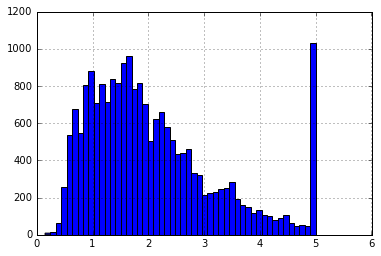

In [9]:
pd.Series(y).hist(bins=50)

In [10]:
bins = np.arange(6)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [11]:
y_binary = np.where(y >= 5, 1,0)

train_shape = X_train.shape[0]

y_train_binned = y_binary[:train_shape]
y_test_binned = y_binary[train_shape:]

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'max_features' : ['log2',0.5,1.0],
              'max_depth' : [2,3,6],
              'min_samples_leaf' : [1,2,3,10],
              'n_estimators': [100],
              'learning_rate' : [0.1,0.2,0.3,1],
              'loss' : ['deviance']
             }
pre_gs_inst = RandomizedSearchCV(GradientBoostingClassifier(warm_start=True),
                                 param_distributions = param_dist,
                                 cv=3,
                                 n_iter = 10, n_jobs=-1)
pre_gs_inst.fit(X_train, y_train_binned)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=True),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'loss': ['deviance'], 'learning_rate': [0.1, 0.2, 0.3, 1], 'min_samples_leaf': [1, 2, 3, 10], 'n_estimators': [100], 'max_features': ['log2', 0.5, 1.0], 'max_depth': [2, 3, 6]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [13]:
pre_gs_inst.best_params_

{'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 1.0,
 'min_samples_leaf': 10,
 'n_estimators': 100}

In [14]:
gbc = GradientBoostingClassifier(**{'learning_rate': 0.2,
 'loss': 'deviance',
 'max_depth': 2,
 'max_features': 1.0,
 'min_samples_leaf': 2,
 'n_estimators': 1000, 'warm_start':True}).fit(X_train, y_train_binned)

In [15]:
y_pred = gbc.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test_binned, y_pred)

0.93604651162790697